# This notebook is just for reproducing the figure from https://arxiv.org/pdf/2005.00078.pdf to make sure we can read in the Saclay solar model data correctly and compute all the relevant quantities

In [1]:
from numpy import *
import sys
sys.path.append('../src')
from Params import *
from AxionFuncs import *
import matplotlib.pyplot as plt
from PlotFuncs import *


#1- r (in unit of solar radius)
#2- m (in unit of solar mass)
#3- T (in K)
#4- P (in dyn/cm^2)
#5- rho (in g/cm^3)
#6- X (hydrogen mass fraction)
#7- Y (helium mass fraction)
#8- Ac (C12+C13 mass fraction)
#9- An (N14+N15 mass fraction)
#10-Ao (O16+O17 mass fraction)
#11-mu (mean molecular weight in amu)
#12-mue (mean molecular weight per free electron in amu)
#13-ne (electron number density in cm^-3)
f=open(data_dir+'solar/saclaymodel/saclaymodel_raw.txt','r')
for i in range(0,19):
    junk = f.readline().split()
    
# Not sure how you're supposed to deal with the fortran float format in python but this is works at least:
ncols = 13
nrows = 2099
dat = zeros(shape=(nrows,ncols))
for i in range(0,nrows):
    a = f.readline().split()
    for j in range(0,ncols):
        dat[i,j] = float(a[j].replace("D", "E"))
        
r = dat[:,0] # radius
M = dat[:,1] # Mass
T = dat[:,2]*K_2_keV # Temp in keV

# Plasma freq.
ne = dat[:,12]/cm_2_keV**3.0
wp = sqrt(4*pi*fsc*ne/511.0)

# Debye screening scale
rho = dat[:,4]
mean_m = dat[:,10]*amu_grams
mean_me = (dat[:,5]+2*dat[:,6]+6*dat[:,7]+7*dat[:,8]+8*dat[:,9])*(9.1e-27)
np = (rho/(mean_m))/cm_2_keV**3.0
Hyd = dat[:,5]
Hel = 2**2.0*dat[:,6]
Cbn = 6**2.0*dat[:,7]
Nit = 7**2.0*dat[:,8]
Oxy = 8**2.0*dat[:,9] 
k_S_e = sqrt(4*pi*fsc*ne/T)
k_S_ions = sqrt(0.2*(4*pi*fsc*np/T)*(Hyd+Hel+Cbn+Nit+Oxy))
k_S = sqrt(4*pi*fsc*ne/T+0.2*(4*pi*fsc*np/T)*(Hyd+Hel+Cbn+Nit+Oxy))


# Save data for more easy access later:
data = flipud(column_stack((r,M,T,rho,dat[:,12],wp,k_S)))
savetxt(data_dir+'solar/saclaymodel/saclaymodel.txt',data,header='Saclay seismic solar model \n R [R_sol] \t M [M_sol] \t T [keV] \t rho [g cm^-3] \t ne [cm^-3] \t Plasma freq. [keV] \t Debye Screening length [keV]')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


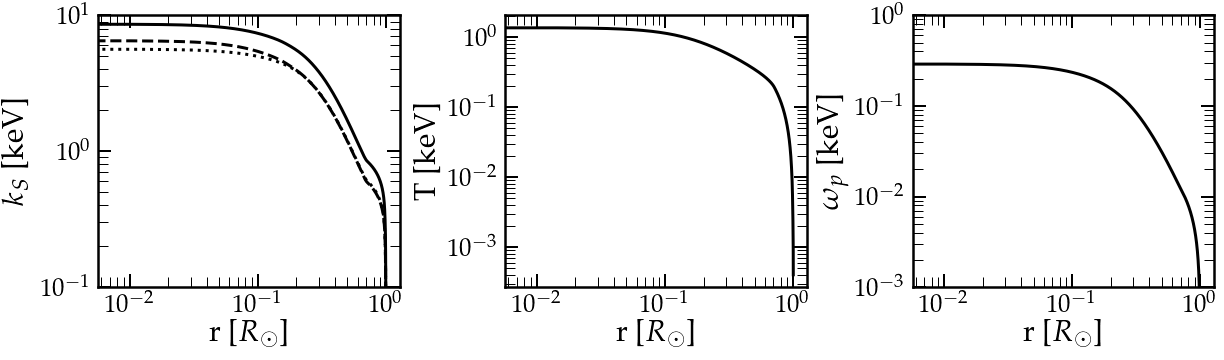

In [8]:
fig,ax1,ax2,ax3 = MyTriplePlot('r [$R_\odot$]','$k_S$ [keV]',\
                     'r [$R_\odot$]','T [keV]',\
                     'r [$R_\odot$]','$\omega_p$ [keV]',\
                     wspace=0.35,size_x=20,size_y=5,lfs=30)

r,M,T,rho,ne,wp,k_S = loadtxt(data_dir+'solar/saclaymodel/saclaymodel.txt',unpack=True)
ax1.loglog(r,flipud(k_S_e),'k:',lw=3)
ax1.loglog(r,flipud(k_S_ions),'k--',lw=3)
ax1.loglog(r,k_S,'k-',lw=3)
ax2.loglog(r,T,'k-',lw=3)
ax3.loglog(r,wp,'k-',lw=3)
ax1.set_ylim([1e-1,1e1])
ax3.set_ylim([1e-3,1e0])
ax1.set_xlim(left=0)

MySaveFig(fig,'SaclayModel')

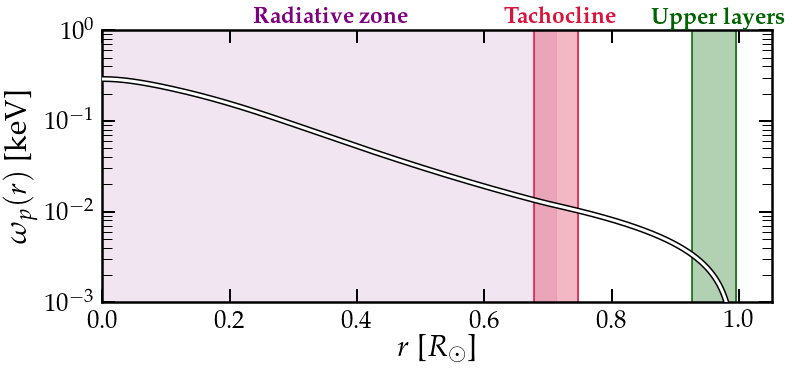

In [59]:
import matplotlib.patheffects as pe
path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()]

fig,ax = MySquarePlot('$r$ [$R_\odot$]','$\omega_p(r)$ [keV]',size_x=12,size_y=5,lfs=30)

ax.semilogy(r,wp,'-',lw=3,path_effects=path_effects,color='w',zorder=100)
ax.set_ylim([1e-3,1e0])
ax.set_xlim(left=0)


plt.gcf().text(0.3,0.9,r'{\bf Radiative zone}',color='purple',fontsize=23)
ax.fill_between([0,0.712],[1e-3,1e-3],y2=[1,1],color='purple',alpha=0.1)
#ax.axvline(0.712,color='blue')


plt.gcf().text(0.59,0.9,r'{\bf Tachocline}',color='crimson',fontsize=23)
ax.fill_between([0.712-0.035,0.712+0.035],[1e-3,1e-3],y2=[1,1],color='crimson',alpha=0.3)
ax.axvline(0.712-0.035,color='crimson')
ax.axvline(0.712+0.035,color='crimson')


plt.gcf().text(0.76,0.9,r'{\bf Upper layers}',color='darkgreen',fontsize=23)
ax.fill_between([0.96-0.035,0.96+0.035],[1e-3,1e-3],y2=[1,1],color='darkgreen',alpha=0.3)
ax.axvline(0.96-0.035,color='darkgreen')
ax.axvline(0.96+0.035,color='darkgreen')


MySaveFig(fig,'SaclayModel_wp')